In [42]:
%matplotlib inline
import numpy as np
import scipy
from scipy.signal import hilbert, chirp, spectrogram, periodogram
import matplotlib.pyplot as plt
from hwpy.common.cordic import CORDIC

fs = 1e3
periods = 1
data_freq = 20

# FM modulator

### Data signal

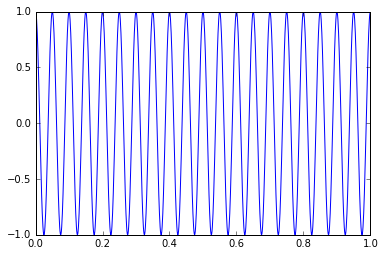

In [48]:
time = np.linspace(0, periods, fs*periods, endpoint=False) # NB! NOTICE ENDPOINT TO MATCH GNURADIO

data = np.cos(2*np.pi*data_freq*time)
plt.plot(time,data)

### Modulated signal

In [1]:
deviation = fs/3
sensitivity = 2*np.pi*deviation/fs
print('Sensitivity:', sensitivity)

d_phase = 0
phl = []

phl = np.cumsum(sensitivity*data)

ref = np.exp(phl*1j)

cord = CORDIC(18)
mod = cord.exp(phl*1j)

plt.plot(ref.real[:100])
plt.plot(ref.imag[:100])
plt.title('NUMPY I/Q')
plt.show()

plt.plot([x.real for x in mod[:100]])
plt.plot([x.imag for x in mod[:100]])
plt.title('CORDIC I/Q')
plt.show()

f, Pxx_den = periodogram(mod, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

NameError: name 'fs' is not defined

### Compare

In [73]:
# reference GNURADIO samples
gr_fmmod = scipy.fromfile(open('mod_samples.32fc'), dtype=scipy.complex64)
np.testing.assert_almost_equal(gr_fmmod[:len(ref)], ref, decimal=4)

np.testing.assert_almost_equal(ref, mod, decimal=4)

CORDIC implementation is equal to NUMPY implemetation, which itself is equal to GNURADIO samples.
All good.

# FM demodulator

In [4]:
gain = samp_rate/(2*np.pi*deviation)
print('Demodulator gain: ', gain)

baseband = mod
demod_data = np.angle( baseband[1:] * np.conjugate(baseband[:-1]) )

demod_data *= gain
# %matplotlib inline
plt.plot(demod_data)
plt.plot(data[1:]) # NB!! for some reason had to trash first sample

np.testing.assert_almost_equal(demod_data, data[1:])

NameError: name 'samp_rate' is not defined